## Students Academic Performance Project

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('StudentsPerformance.csv')


In [3]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Basic EDA (Must Do)

In [4]:
data.shape

(1000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Target variable

In [8]:
y = data['math score']
X = data[['reading score', 'writing score']]


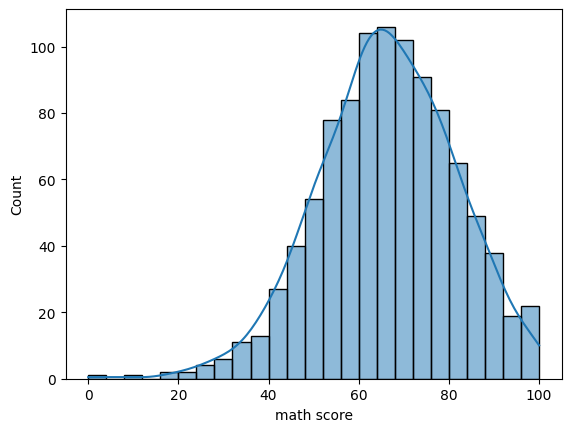

In [9]:
sns.histplot(data['math score'],kde=True)
plt.show()

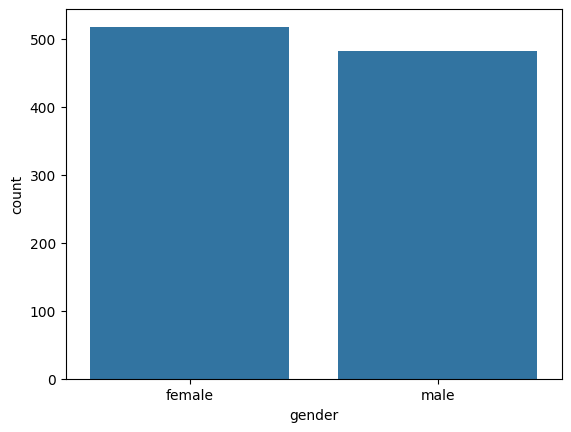

In [11]:
sns.countplot(x='gender',data=data)
plt.show()

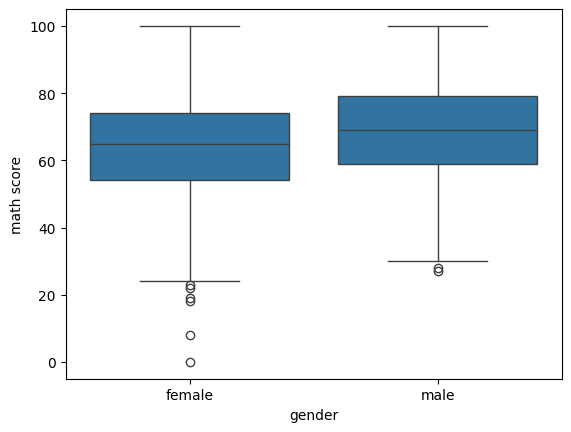

In [13]:
# Bivariate Analysis 
# Gender vs Math Score

sns.boxplot(x='gender', y='math score' , data=data)
plt.show()

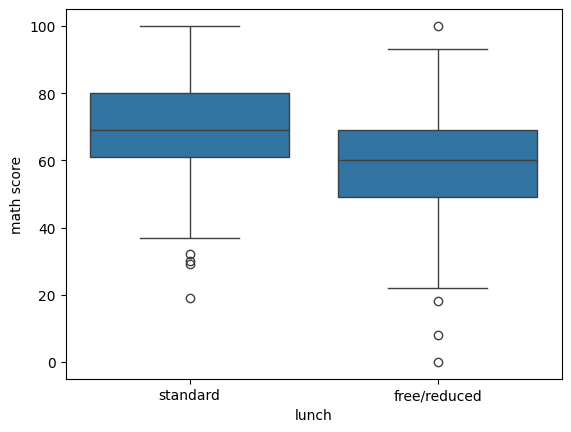

In [14]:
# LUNCH VS MATH

sns.boxplot(x='lunch', y='math score' , data=data)
plt.show()

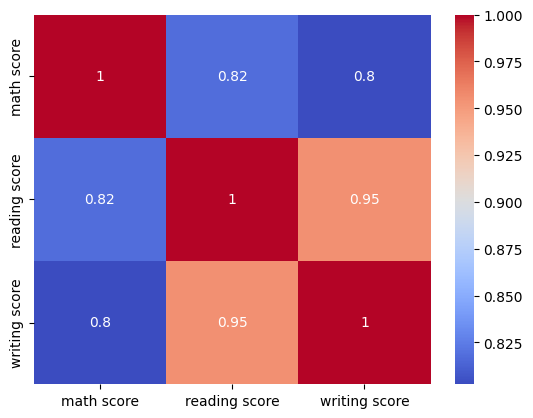

In [16]:
# Correlation Analysis

corr = data[['math score' , 'reading score', 'writing score']].corr()
sns.heatmap(corr ,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# Data Preprocessing (Handling Dataset)
X =  data.drop(['math score','reading score', 'writing score'] ,axis=1)
y = data['math score']

In [29]:
#Encode Categorical Columns
cat_cols = X.select_dtypes(include='object').columns


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)





# ******************************************************************************
# cat_cols = X.select_dtypes(include='object').columns
# num_cols = X.select_dtypes(include='int').columns

# preprocessor = ColumnTransformer([
#     ('cat', OneHotEncoder(drop='first'), cat_cols),
#     ('num', 'passthrough', num_cols)

    
# ])

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('rf', RandomForestRegressor(random_state=42))])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)
model = Pipeline([
    ('prep',preprocessor),
    ('rf',RandomForestRegressor(random_state=42))
])
model.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['reading score', 'writing score'], dtype='object'))])),
                ('rf', RandomForestRegressor(random_state=42))])

In [27]:


y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.8488482534120778

In [28]:
import joblib

joblib.dump(model, 'student_performance_model.pkl')


['student_performance_model.pkl']